# Closed competitive log Utility

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
from scipy.optimize import newton

## Parameters
### Consumers

In [2]:
N = 1
W = 5
t = 2.5
t_ = 0
theta = 0.2
a = 1

### Developers

In [3]:
r_ = 1
delta = 1.6
c0 = 1

### Landlords

In [4]:
t_I = 0.33
t_CG = 0.15
t_ID = t_I
t_R = 0.0033
f = 0.01
beta = 0.5
pi = 0.015
g = 0.015
i = 0.045
phi = 0.03

## Derived parameters
The Poterba scaler:

In [5]:
j = ((beta * i + f + t_R) * (1 - t_ID) + (1 - beta) * (i + phi) - (g + pi) * (1 - t_CG)) / (1 - t_I)

In [6]:
B = -theta * t * delta / (a * (delta - 1))
A = lambda d_: 2 * np.pi / a * delta * j * r_ / (delta - 1) * np.exp(-B * d_)


## Solve for equilibrium city radius


In [7]:
city_radius_eqn = lambda d_: A(d_) / B * (d_ * np.exp(B * d_) - (np.exp(B * d_) - 1) / B) - N
d_ = newton(city_radius_eqn, 1)

## Solve initial condition for rent at the centre

In [8]:
p0 = delta * c0 ** (1 / delta) * j * (r_ / (delta - 1)) ** ((delta - 1) / delta) * np.exp(theta * t * d_ / a)


## Equilibrium prices/quantities

### Eq rent and house prices


In [9]:
p = lambda d: p0 * np.exp(-theta * t * d / a)
P = lambda d: p(d) / j



### Eq land prices


In [10]:
r = lambda d: r_ * np.exp(-B * (d_ - d))



### Eq quantity of land


In [11]:
L = lambda d: a * (delta * c0 * j) ** (1 / (delta - 1)) * p(d) ** (delta / (1 - delta))
L_density = lambda d: 1 / L(d)

### Eq quantity of housing

In [13]:
H = lambda d: a / p(d)
h = lambda d: H(d) / L(d)


### Utility

In [14]:
U = W - (1 - theta) * t_ - a + a * np.log(a) - a * np.log(p0)

### Differential land rents

In [16]:
diff_land_rents, error = quad(lambda d: 2 * np.pi * d * (r(d) - r_), 0, d_)


## Solve the model

In [17]:
d = np.linspace(0, 1.5, 301)

eq = pd.DataFrame({'p(d)': p(d),
                   'P(d)': P(d),
                   'r(d)': r(d),
                   'L(d)': L(d),
                   '1/L(d)': L_density(d),
                   'H(d)': H(d),
                   'h(d)': h(d),
                   'r_': r_})
eq.index = d



## Plot the results


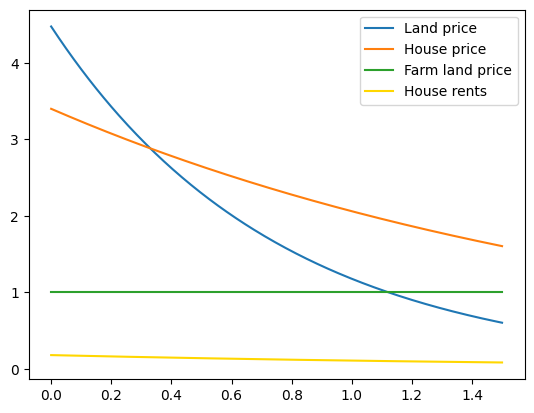

In [18]:
eq['r(d)'].plot(label='Land price')
eq['P(d)'].plot(label='House price')
eq['r_'].plot(label='Farm land price')
eq['p(d)'].plot(label='House rents', c='gold')
plt.legend()
plt.show()